In [ ]:
# !pip install pyenchant
# !apt install enchant
print("Installed enchant lib")

Installed enchant lib


In [ ]:
# Functions.py
import re  # for pattern matching
from collections import Counter
from math import log2

import enchant

dictionary = enchant.Dict("en_US")

# Parse a domain name
def parse_domain(domain_name):
    domains = domain_name.split('.')
    domain_level = {}
    i = 1
    while domains:
        domain_level[i] = domains.pop()
        i += 1
    return domain_level


# Returns the top level domain
def get_tld(domain):
    domain_level = parse_domain(domain)
    return domain_level.get(1,None)


# Returns the second level domain
def get_second_level_domain(domain):
    domain_level = parse_domain(domain)
    return domain_level.get(2,None)


def calculate_kl_divergence(domain, distribution):
    characters = Counter(list(domain))
    divergence = 0
    domain_len = len(domain)
    for x in characters:
        temp = characters[x] / domain_len
        divergence += -1 * temp * (log2(temp / distribution.get(x, 0.2)))
    return divergence


def n_gram(domain, grams):
    domain_len = len(domain)
    for i in range(domain_len):
        for j in range(2, 5):
            if i + j <= domain_len:
                string = domain[i:i + j]
                grams[j][string] = grams[j].get(string, 0) + 1


def get_character_distribution(dataset):
    distribution = {}
    total_characters = 0
    for i, x in dataset.iterrows():
      characters = Counter(x[0])
      for j in characters:
        if j.isalpha():
            total_characters += characters[j]
            distribution[j] = distribution.get(j, 0) + characters[j]
    return {key: value / total_characters for (key, value) in
            distribution.items()}


# calculate the amount of vowels
def vowel_count(domain):
    return len(re.findall(r'[aeiou]', domain))


# calculate the amount of digits
def digit_count(domain):
    return len([c for c in list(domain) if c.isdigit()])


# This function applies <func> to each value of <target_column> column in a row.
def process_each_row(function, data_frame, target_column, new_column):
    data_frame[new_column] = data_frame[target_column].apply(function)


# calculate no. of repeated character
def count_repeated_character(domain):
    repeated = []
    character_frequency = Counter(list(domain))
    for character, frequency in character_frequency.items():
        if frequency > 1:
            repeated.append(character)

    return len(repeated)


# Adds a "class" column in the dataset and fills it with value <label>
def label_dataset(data_frame, label):
    data_frame['class'] = label


# Adds a "type" column in the dataset and fill it with value <type>
def type_of_data(data_frame, type):
    data_frame['type'] = type





def meaning_full_substrings(word):
    _ = []
    for i in range(len(word)):
        for j in range(i + 1, len(word) + 1):
            if len(word[i:j]) > 2 and dictionary.check(word[i:j]):
                _.append(word[i:j])
    return _


In [ ]:
import pandas as pd

DGA = {'banjori', 'chinad', 'newgoz', 'necurs'}
AGD = {}
en_grams = {2: {}, 3: {}, 4: {}}
benign_grams = {2: {}, 3: {}, 4: {}}


def load_agd_dataset():
    for x in DGA:
        AGD[x] = pd.read_csv(f'{x}.csv')
        label_dataset(AGD[x], x)
        type_of_data(AGD[x], 'agd')


def load_benign_dataset():
    temp = pd.read_csv('benign_domain.csv')
    temp = temp[:4000]
    temp = temp.rename(columns={"Domains": "domain"})
    type_of_data(temp, 'benign')
    return temp


def load_english_word_dataset():
    return pd.read_csv('words.csv')


def concat_agd_dataset():
    _ = []
    for x in AGD:
        _.append(AGD[x])
    return pd.concat(_)


load_agd_dataset()

for x in AGD:
  if AGD[x].shape[0] > 1000:
    AGD[x] = AGD[x][:1000]

en_word_dataset = load_english_word_dataset()
agd_dataset = concat_agd_dataset()

benign_dataset = load_benign_dataset()
##

process_each_row(get_second_level_domain, benign_dataset, 'domain',
                     'second_level_domain')
process_each_row(get_second_level_domain, agd_dataset, 'domain',
                     'second_level_domain')
# process_each_row(get_tld, dataset, 'domain', 'top_level_domain')

benign_dataset = benign_dataset[['second_level_domain','type','domain']]


# # Frequency of characters
en_word_character_frequency = get_character_distribution(en_word_dataset)
benign_domains_character_frequency = get_character_distribution(benign_dataset)


# for index, x in en_word_dataset.iterrows():
#   n_gram(x['second_level_domain'], en_grams)

# for index, x in benign_dataset.iterrows():
#   n_gram(x[], benign_grams)


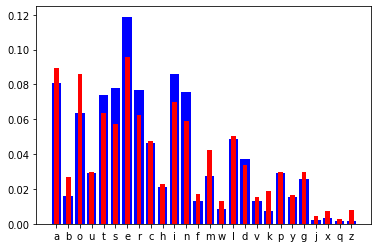

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(en_word_character_frequency.keys(), en_word_character_frequency.values(), 0.8, color='b')
plt.bar(benign_domains_character_frequency.keys(), benign_domains_character_frequency.values(), 0.4, color='r')

plt.show()


In [ ]:
# Features :
# 1. Length of domain (done)
# 2. Vowel ratio in domain (done)
# 3. Digit ratio (done)
# 4. Repeat character ratio in domain (done)
# 5. Consecutive digits ratio (done)
# 6. Entropy of Domain (done)
# 7. Relative Entropy of Domain (done)
# 8. N-gram Score (bi-gram, tri-gram, quad-gram) (done)
# 9. Meaning full sub-string
# 10. Longest meaning full string


# FEATURE : Length of domain
# calculate the length of a domain
def length_of_domain(domain):
    return len(domain)


# FEATURE : Vowel ratio in domain
# calculate the ratio of vowels in domain to length
def ratio_of_vowel(domain):
    return vowel_count(domain) / len(domain)


# FEATURE : Digit ratio
# calculate the ratio of digits
def ratio_of_digit(domain):
    return digit_count(domain) / len(domain)


# FEATURE : Repeat character ratio in domain
# calculate the ratio repeated character to total characters
def repeat_character_ratio(domain):
    char_repeated = count_repeated_character(domain)
    return char_repeated / len(domain)


# FEATURE : Consecutive digits ratio
def consecutive_digits(domain):
    return len(re.findall(r'[0-9][0-9]+', domain))


# FEATURE : Entropy of Domain
def calculate_shanon_entropy(domain):
    characters = Counter(list(domain))
    entropy = 0
    for x in characters:
        temp = characters[x] / len(domain)
        entropy += -1 * temp * (log2(temp))
    return entropy


# FEATURE : Relative Entropy of Domain
def divergence_from_en_word(domain):
    return calculate_kl_divergence(domain, en_word_character_frequency)


def divergence_from_benign_domains(domain):
    return calculate_kl_divergence(domain, benign_domains_character_frequency)


# FEATURE : N-gram Score
# Create a gram dictionary
# gram_dict = {'2':{},'3':{},'4':{}}
def n_gram_score(domain,gram):
    domain_len = len(domain)
    score = {4: 0, 2: 0, 3: 0}
    for i in range(domain_len):
        for j in range(2, 5):
            if i + j <= domain_len:
                string = domain[i:i + j]
                score[j] += gram[j].get(string, 0)
    for x in score:
        score[x] = score[x] / domain_len
    return score


def en_bi_gram_score(domain):
    return n_gram_score(domain,en_grams)[2]


def en_tri_gram_score(domain):
    return n_gram_score(domain,en_grams)[3]


def en_quad_gram_score(domain):
    return n_gram_score(domain,en_grams)[4]

def benign_bi_gram_score(domain):
    return n_gram_score(domain,benign_grams)[2]


def benign_tri_gram_score(domain):
    return n_gram_score(domain,benign_grams)[3]


def benign_quad_gram_score(domain):
    return n_gram_score(domain,benign_grams)[4]

# FEATURE: Meaning full sub-string ratio
# Return the list of meaning full word in a string
def meaning_full_character_ratio(domain):
    return len(meaning_full_substrings(domain)) / len(domain)


# FEATURE: Max length of meaning full sub-string
# Return the length of the longest meaning full substring
def length_of_longest_meaning_full_domain(domain):
    temp = meaning_full_substrings(domain)
    if len(temp) == 0:
        return 0
    return max(map(len, temp)) / len(domain)


In [ ]:
def calculate_features(dataset):
    # dataset = dataset.dropna()
    process_each_row(length_of_domain, dataset, 'second_level_domain', 'length')
    process_each_row(ratio_of_vowel, dataset, 'second_level_domain',
                     'vowel ratio')
    process_each_row(ratio_of_digit, dataset, 'second_level_domain',
                     'digit ratio')
    process_each_row(repeat_character_ratio, dataset, 'second_level_domain',
                     'repeat character ratio')
    process_each_row(consecutive_digits, dataset, 'second_level_domain',
                     'consecutive digit ratio')
    process_each_row(calculate_shanon_entropy, dataset, 'second_level_domain',
                     'entropy')
    # Relative entropy with english words
    process_each_row(divergence_from_en_word, dataset, 'second_level_domain',
                     'divergence_from_en')

    # Relative entropy with benign domains
    process_each_row(divergence_from_benign_domains, dataset, 'second_level_domain',
                     'divergence_from_benign')

    # N-gram Score with english words
    process_each_row(en_bi_gram_score, dataset, 'second_level_domain',
                     'en_bi_gram_score')
    process_each_row(en_tri_gram_score, dataset, 'second_level_domain',
                     'en_tri_gram_score')
    process_each_row(en_quad_gram_score, dataset, 'second_level_domain',
                     'en_quad_gram_score')

    # N-gram Score with benign domains
    process_each_row(benign_bi_gram_score, dataset, 'second_level_domain',
                     'benign_bi_gram_score')
    process_each_row(benign_tri_gram_score, dataset, 'second_level_domain',
                     'benign_tri_gram_score')
    process_each_row(benign_quad_gram_score, dataset, 'second_level_domain',
                     'benign_quad_gram_score')

    process_each_row(meaning_full_character_ratio, dataset,
                     'second_level_domain',
                     'meaning_full_string_ratio')
    process_each_row(length_of_longest_meaning_full_domain, dataset,
                     'second_level_domain',
                     'length_of_longest_meaning_full_domain')

In [ ]:
calculate_features(agd_dataset)

In [ ]:
calculate_features(benign_dataset)

In [ ]:
benign_dataset.describe()

,type,length,vowel ratio,digit ratio,repeat character ratio,consecutive digit ratio,entropy,divergence_from_en,divergence_from_benign,en_bi_gram_score,en_tri_gram_score,en_quad_gram_score,benign_bi_gram_score,benign_tri_gram_score,benign_quad_gram_score,meaning_full_string_ratio,length_of_longest_meaning_full_domain
count,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.0,7.478200,0.359301,0.021531,0.122677,0.034600,2.424839,-1.973378,-2.244155,224.177223,19.300967,2.172085,311.250914,62.699759,3.443015,0.342806,0.515663
std,0.0,3.603737,0.136546,0.100713,0.114522,0.183874,0.650988,0.912803,0.959452,120.538381,20.640065,4.978765,515.050504,216.243043,6.853201,0.302440,0.317830
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.181227,-9.723625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,5.000000,0.300000,0.000000,0.000000,0.000000,2.000000,-2.517350,-2.544301,132.166667,4.000000,0.000000,110.000000,4.829545,0.500000,0.142857,0.375000
50%,1.0,7.000000,0.363636,0.000000,0.125000,0.000000,2.521641,-1.778460,-2.031773,234.062500,13.666667,0.777778,159.690476,12.118056,1.500000,0.333333,0.555556
75%,1.0,10.000000,0.444444,0.000000,0.200000,0.000000,2.921928,-1.304310,-1.644908,297.776786,27.000000,2.636364,212.833333,21.205556,3.861607,0.500000,0.714286
max,1.0,27.000000,1.000000,1.000000,0.500000,2.000000,3.697846,0.199713,-0.685479,696.444444,193.666667,87.500000,2253.000000,1051.333333,57.500000,4.083333,1.000000


In [ ]:
agd_dataset.describe()

,type,length,vowel ratio,digit ratio,repeat character ratio,consecutive digit ratio,entropy,divergence_from_en,divergence_from_benign,en_bi_gram_score,en_tri_gram_score,en_quad_gram_score,benign_bi_gram_score,benign_tri_gram_score,benign_quad_gram_score,meaning_full_string_ratio,length_of_longest_meaning_full_domain
count,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.0,20.454500,0.202148,0.151191,0.211297,0.665750,3.672533,-1.063980,-2.263782,99.455060,6.996909,0.967584,69.403157,3.057511,0.168706,0.132053,0.172851
std,0.0,6.010238,0.115303,0.168755,0.078328,1.008356,0.375074,0.795764,0.945191,96.677233,10.289000,1.637384,64.612380,4.822432,0.281747,0.159416,0.169963
min,0.0,7.000000,0.000000,0.000000,0.000000,0.000000,1.378783,-4.555933,-4.856591,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,16.000000,0.115385,0.000000,0.160000,0.000000,3.500000,-1.521038,-3.006121,22.722500,0.062500,0.000000,19.984375,0.160000,0.000000,0.000000,0.000000
50%,0.0,22.000000,0.187500,0.000000,0.222222,0.000000,3.750000,-0.807848,-2.340434,55.639423,0.875000,0.000000,41.934524,0.692308,0.000000,0.062500,0.142857
75%,0.0,26.000000,0.307692,0.312500,0.269231,1.000000,3.902175,-0.588562,-1.218068,237.807692,22.115385,3.538462,143.817308,8.538462,0.500000,0.346154,0.423077
max,0.0,28.000000,0.727273,0.653846,0.428571,5.000000,4.563856,0.783922,-0.737935,361.961538,95.142857,10.142857,840.125000,132.208333,2.857143,0.777778,0.571429


In [ ]:
x = agd_dataset.iloc[:,5:].values

In [ ]:
import numpy as np
x = np.asarray(x)

In [ ]:
x

array([[26.        ,  0.38461538,  0.        , ...,  0.69230769,
         0.53846154,  0.42307692],
       [26.        ,  0.34615385,  0.        , ...,  0.57692308,
         0.42307692,  0.42307692],
       [26.        ,  0.30769231,  0.        , ...,  0.5       ,
         0.34615385,  0.42307692],
       ...,
       [16.        ,  0.0625    ,  0.125     , ...,  0.        ,
         0.        ,  0.        ],
       [16.        ,  0.1875    ,  0.1875    , ...,  0.0625    ,
         0.0625    ,  0.1875    ],
       [16.        ,  0.4375    ,  0.3125    , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_temp = sc.fit_transform(x[:,:])

In [ ]:
scaled_temp

array([[ 0.92279097,  1.5827022 , -0.89603238, ...,  1.85863927,
         2.54967903,  1.47242225],
       [ 0.92279097,  1.24909179, -0.89603238, ...,  1.44905593,
         1.8257922 ,  1.47242225],
       [ 0.92279097,  0.91548139, -0.89603238, ...,  1.17600037,
         1.34320097,  1.47242225],
       ...,
       [-0.74124468, -1.21128496, -0.15521961, ..., -0.59886078,
        -0.82845952, -1.01712103],
       [-0.74124468, -0.12705113,  0.21518678, ..., -0.37700314,
        -0.43635415,  0.08619928],
       [-0.74124468,  2.04141651,  0.95599955, ..., -0.59886078,
        -0.82845952, -1.01712103]])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

db = DBSCAN(eps=1.5, min_samples=10).fit(scaled_temp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(scaled_temp, labels))

Estimated number of clusters: 4
Estimated number of noise points: 262


In [ ]:
from collections import Counter
Counter(labels.tolist())

Counter({-1: 262, 0: 992, 1: 2708, 2: 10, 3: 28})